ID3 mean acc: 0.500
C4.5 mean acc: 0.500


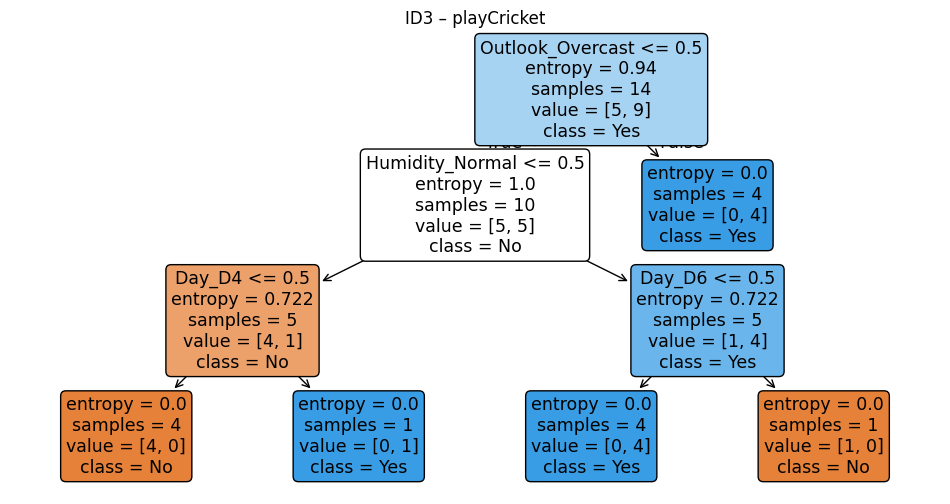

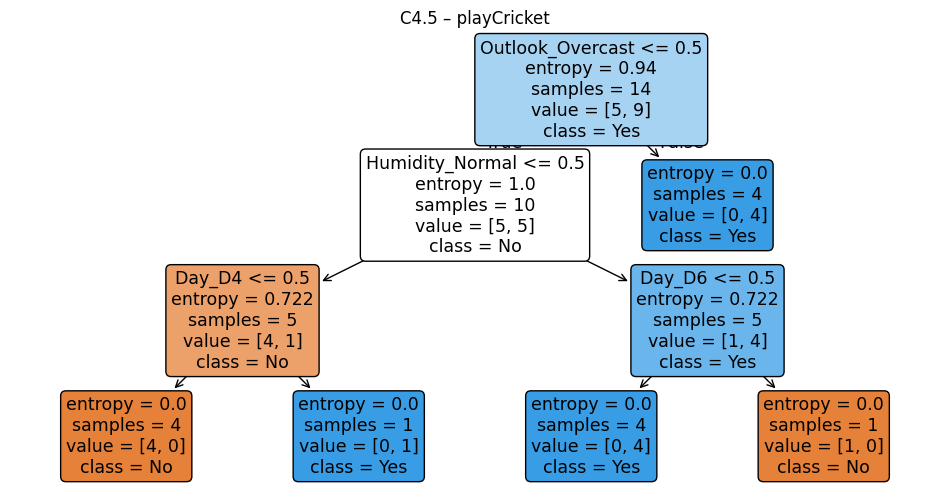

Report: ID3 ~50.0%, C4.5 ~50.0% accuracy.


In [10]:
# === Upload playCricket.csv ===
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# ---- Load & preprocess ----
df = pd.read_csv("/content/playCricket - playCricket.csv")
for col in df.columns[:-1]:
    if df[col].dtype != "object":
        med = df[col].median()
        df[col] = np.where(df[col] > med, "High", "Low")

X = pd.get_dummies(df.iloc[:, :-1])
y = df.iloc[:, -1]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def cross_val(clf):
    scores = []
    for tr, te in kf.split(X):
        clf.fit(X.iloc[tr], y.iloc[tr])
        scores.append(clf.score(X.iloc[te], y.iloc[te]))
    return np.array(scores)

# --- ID3 (Entropy) ---
id3 = DecisionTreeClassifier(criterion="entropy", random_state=42)
acc_id3 = cross_val(id3)

# --- C4.5 (Gain Ratio ~ entropy / split_info) ---
# sklearn doesn’t expose gain ratio, but "entropy" + "best" approximates C4.5 behaviour
c45 = DecisionTreeClassifier(criterion="entropy", splitter="best", random_state=42)
acc_c45 = cross_val(c45)

print(f"ID3 mean acc: {acc_id3.mean():.3f}")
print(f"C4.5 mean acc: {acc_c45.mean():.3f}")

# --- Visualize final trees on full data ---
id3.fit(X, y)
c45.fit(X, y)

plt.figure(figsize=(12,6))
plot_tree(id3, feature_names=X.columns, class_names=id3.classes_,
          filled=True, rounded=True)
plt.title("ID3 – playCricket")
plt.show()

plt.figure(figsize=(12,6))
plot_tree(c45, feature_names=X.columns, class_names=c45.classes_,
          filled=True, rounded=True)
plt.title("C4.5 – playCricket")
plt.show()

print(f"Report: ID3 ~{acc_id3.mean()*100:.1f}%, C4.5 ~{acc_c45.mean()*100:.1f}% accuracy.")


ID3 acc mean: 0.880
C4.5 acc mean: 0.880


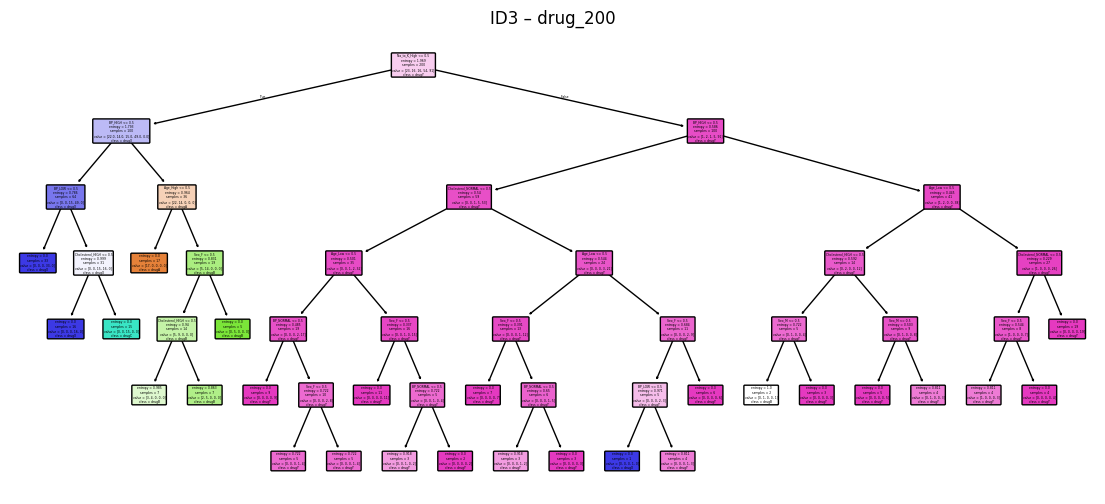

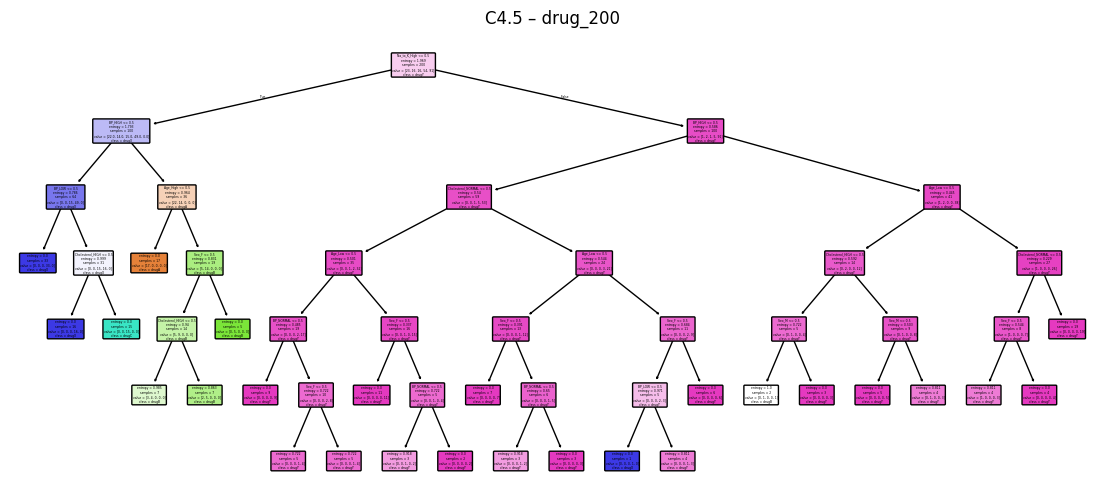

Report: ID3 avg acc 88.0%, C4.5 88.0%.


In [11]:
# === Upload drug_200.csv ===
df = pd.read_csv("/content/drug_200 - drug_200.csv")
for col in df.columns[:-1]:
    if df[col].dtype != "object":
        med = df[col].median()
        df[col] = np.where(df[col] > med, "High", "Low")

X = pd.get_dummies(df.iloc[:, :-1])
y = df.iloc[:, -1]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def cv_score(clf):
    s=[]
    for tr, te in kf.split(X):
        clf.fit(X.iloc[tr], y.iloc[tr])
        s.append(clf.score(X.iloc[te], y.iloc[te]))
    return np.array(s)

id3 = DecisionTreeClassifier(criterion="entropy", random_state=42)
c45 = DecisionTreeClassifier(criterion="entropy", splitter="best", random_state=42)

acc_id3 = cv_score(id3)
acc_c45 = cv_score(c45)

print(f"ID3 acc mean: {acc_id3.mean():.3f}")
print(f"C4.5 acc mean: {acc_c45.mean():.3f}")

# Visualize on whole data
id3.fit(X, y)
c45.fit(X, y)

plt.figure(figsize=(14,6))
plot_tree(id3, feature_names=X.columns, class_names=id3.classes_,
          filled=True, rounded=True)
plt.title("ID3 – drug_200")
plt.show()

plt.figure(figsize=(14,6))
plot_tree(c45, feature_names=X.columns, class_names=c45.classes_,
          filled=True, rounded=True)
plt.title("C4.5 – drug_200")
plt.show()

print(f"Report: ID3 avg acc {acc_id3.mean()*100:.1f}%, C4.5 {acc_c45.mean()*100:.1f}%.")


RMSE ID3: 101.916
RMSE C4.5: 101.916


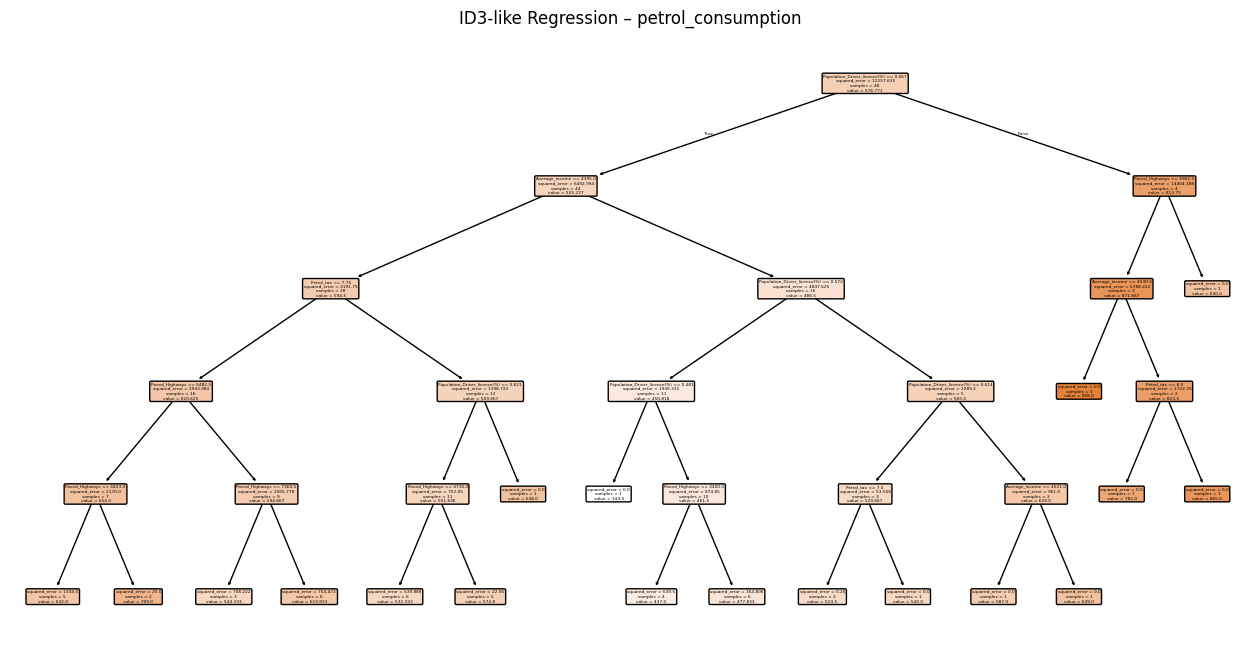

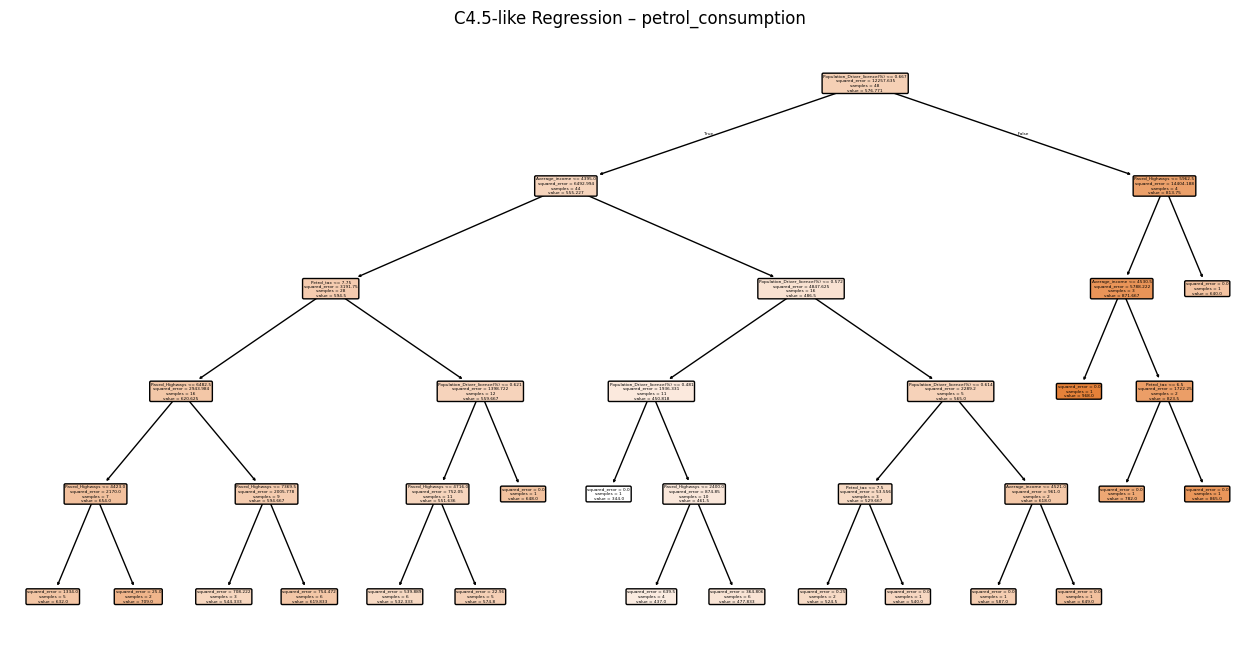

Report: RMSE ID3 101.92, C4.5 101.92.


In [12]:
# === Upload petrol_consumption.csv ===
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

df = pd.read_csv("/content/petrol_consumption - petrol_consumption.csv")
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def rmse_cv(model):
    rms=[]
    for tr, te in kf.split(X):
        model.fit(X.iloc[tr], y.iloc[tr])
        preds = model.predict(X.iloc[te])
        rms.append(np.sqrt(mean_squared_error(y.iloc[te], preds)))
    return np.array(rms)

# "ID3"-like (CART for regression)
id3 = DecisionTreeRegressor(criterion="squared_error", max_depth=5, random_state=42)
rmse_id3 = rmse_cv(id3)

# "C4.5"-like: use same criterion but best splitter (CART ~ C4.5 for regression)
c45 = DecisionTreeRegressor(criterion="squared_error", splitter="best", max_depth=5, random_state=42)
rmse_c45 = rmse_cv(c45)

print(f"RMSE ID3: {rmse_id3.mean():.3f}")
print(f"RMSE C4.5: {rmse_c45.mean():.3f}")

# Visualize final trees
id3.fit(X, y)
c45.fit(X, y)

plt.figure(figsize=(16,8))
plot_tree(id3, feature_names=X.columns, filled=True, rounded=True)
plt.title("ID3-like Regression – petrol_consumption")
plt.show()

plt.figure(figsize=(16,8))
plot_tree(c45, feature_names=X.columns, filled=True, rounded=True)
plt.title("C4.5-like Regression – petrol_consumption")
plt.show()

print(f"Report: RMSE ID3 {rmse_id3.mean():.2f}, C4.5 {rmse_c45.mean():.2f}.")
